In [16]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter

In [17]:
def ax_pattern(G, pos, susceptible, infected, removed, t, ax):
    ax.clear()
    ax.axis('off')
    nx.draw_networkx_nodes(G, pos, nodelist=susceptible, node_size=200, node_color="blue", ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=infected, node_size=200, node_color="red", ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=removed, node_size=200, node_color="gray", ax=ax)
    nx.draw_networkx_edges(G, pos, width=0.2, ax=ax)
    nx.draw_networkx_labels(G, pos) 
    ax.plot([], [], ' ', label="t = {}".format(t))
    ax.legend()
    
def cascade_step(G, p, susceptible, infected, removed):
    new_removed = removed.union(infected)
    new_susceptible = susceptible
    new_infected = set()

    for node in infected:
        for child in G.neighbors(node):
            if child in new_susceptible:
                toss_a_coin = random.random()
                if toss_a_coin < p:
                    new_infected.add(child)
                    new_susceptible.remove(child)
                    
    return new_susceptible, new_infected, new_removed

def sir_gif(G, infected, p=0.7, max_iter=100, seed=1):
    random.seed(a = seed)
    pos = nx.kamada_kawai_layout(G)
    nodes = set(G.nodes())
    susceptible = nodes.difference(infected)
    removed = set()
    
    fig, ax = plt.subplots()
    
    def animate(i, lst, ax): 
        G = lst[0]
        pos = lst[1]
        susceptible = lst[2]
        infected = lst[3]
        removed = lst[4]
        
        if (i == 0) or (len(infected) == 0):
            ax_pattern(G, pos, lst[2], lst[3], lst[4], i, ax)
        else:
            lst[2], lst[3], lst[4] = cascade_step(G, p, susceptible, infected, removed)
            ax_pattern(G, pos, lst[2], lst[3], lst[4], i, ax)
            
            
    life_animation = animation.FuncAnimation(fig, 
                                             animate, 
                                             fargs=([G, pos, susceptible, infected, removed], ax),
                                             save_count=max_iter,
                                             interval = 1000,
                                             repeat = False)

    life_animation.save('SIR.gif',
                        writer='imagemagick',
                        fps=1,
                        dpi=290)
    

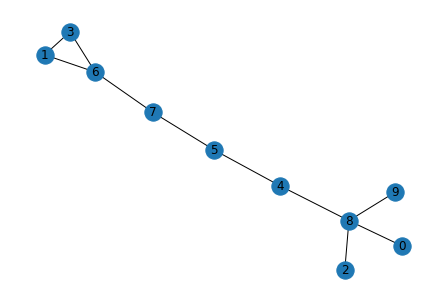

In [18]:
G = nx.generators.random_graphs.gnm_random_graph(10, 10, seed=1447)
nx.draw(G, with_labels=True)

MovieWriter imagemagick unavailable; using Pillow instead.


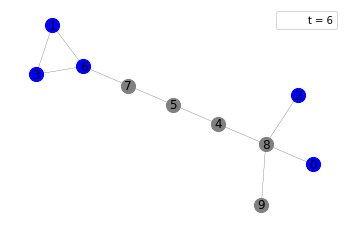

In [19]:
infected = [8]
sir_gif(G, infected, p=0.5, max_iter=7)